<a href="https://colab.research.google.com/github/suriyanrk/Ted-Talk-Views-Prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ted Talk Views Prediction**
-------





###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**
---
###**Dataset Information**
* Number of instances: 4,005
* Number of attributes: 19
---
###**Features information:**
###The dataset contains features like:


Attribute  | Description  
-------------------|------------------
 **talk_id**| Talk identification number provided by TED
 **title** |Title of the talk
 **speaker_1**| First speaker in TED's speaker list
 **all_speakers**| Speakers in the talk
 **occupations**| Occupations of the speakers
 **about_speakers**| Blurb about each speaker
 **recorded_date**| Date the talk was recorded
 **published_date**| Date the talk was published to TED.com
 **event**| Event or medium in which the talk was given
 **native_lang**| Language the talk was given in
 **available_lang**| All available languages (lang_code) for a talk
 **comments**| Count of comments
 **duration**| Duration in seconds
 **topics**| Related tags or topics for the talk
 **related_talks**| Related talks (key='talk_id',value='title')
 **url**| URL of the talk
 **description**| Description of the talk
 **transcript**| Full transcript of the talk
 

---
###**Target Variable :**
* **'views'**: Count of views
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

#**Project Work flow**
---

1. Importing Libraries

2. Loading the Dataset

3. EDA on features 

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Fitting the regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion
--- 

#**1. Importing Libraries**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore') 

**Now, Let's proceed with loading the dataset**

In [2]:
# mounting the drive to the notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**2. Loading the dataset**

In [3]:
# Loading the data from drive to notebook
path='/content/drive/MyDrive/Capestone/Ted Talk Views Prediction/data_ted_talks.csv'
df=pd.read_csv(path)

**Now, we have loaded the dataset. So, let's start with EDA on features.**

#**3.Let's start with Exploratory Data Analysis**

In [4]:
#Shape of the dataset
df.shape

(4005, 19)

* **No of records: 4005**
* **No of columns: 19**

In [5]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* **Here, we have only 3 numerical columns in our dataset out of which 1 is our target variable and 2 can be used as features and rest all columns are either categorical or they contains textual data.**
* **So, our main goal here is to find or generate some numerical columns from these columns.**

In [6]:
#Looking at the dataset
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


**Check for duplicate data**

In [7]:
#Checking for duplicate data
df.duplicated().sum()

0

**There are no duplicated rows**

##**3.1 Let's Check for null values**

In [8]:
df.isnull().sum().reset_index().rename(columns={'index':'features',0:'count'}).sort_values('count',ascending=False)

,features,count
12,comments,655
4,occupations,522
5,about_speakers,503
3,all_speakers,4
7,recorded_date,1
0,talk_id,0
17,description,0
16,url,0
15,related_talks,0
14,topics,0


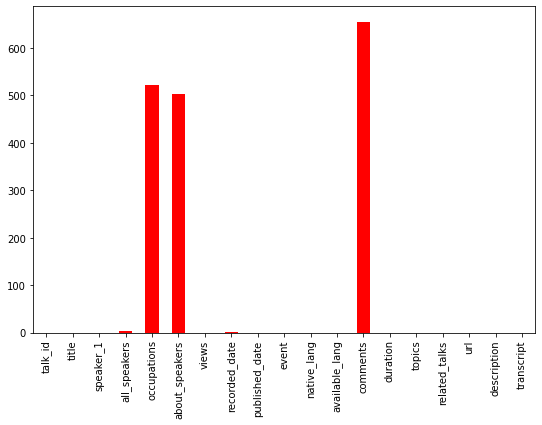

In [9]:
#Frequency of the missing data in each feature
plt.figure(figsize=(9,6))
df.isnull().sum().plot(kind='bar',color='r')

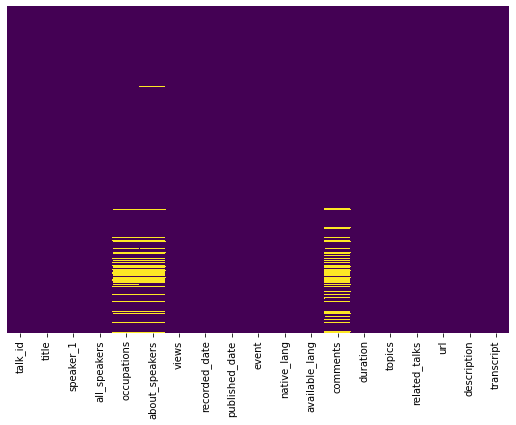

In [10]:
#checking the missing data in the dataset
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


**The dataset contains NaN values in few columns like:**
* **all_speakers**
* **occupations**
* **about_speakers**
* **comments**
* **recorded_date**

**Dropping the url column as it is of no significance.**

In [11]:
#Dropping the url column
df.drop('url',inplace=True,axis=1)

##**3.2 Let's explore speaker_1 column**

**Speakers of top 5 most watched videos**

In [12]:
#Extarcting the records of top 5 most viewed videos
pop_df=df.nlargest(5, ['views'])
pop_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


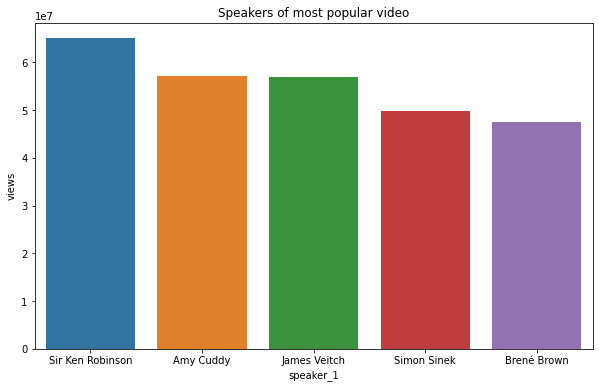

In [13]:
#Plotting the top 5 speakers
plt.figure(figsize=(10,6))
plt.title("Speakers of most popular video")
sns.barplot(x='speaker_1',y='views',data=pop_df)

* **Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.**
* **It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views.**
* **There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.**

In [14]:
#finding most popular speaker from the dataset
pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).rename(columns={'views':'total_views'}).nlargest(15,['total_views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df


,speaker_1,total_views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


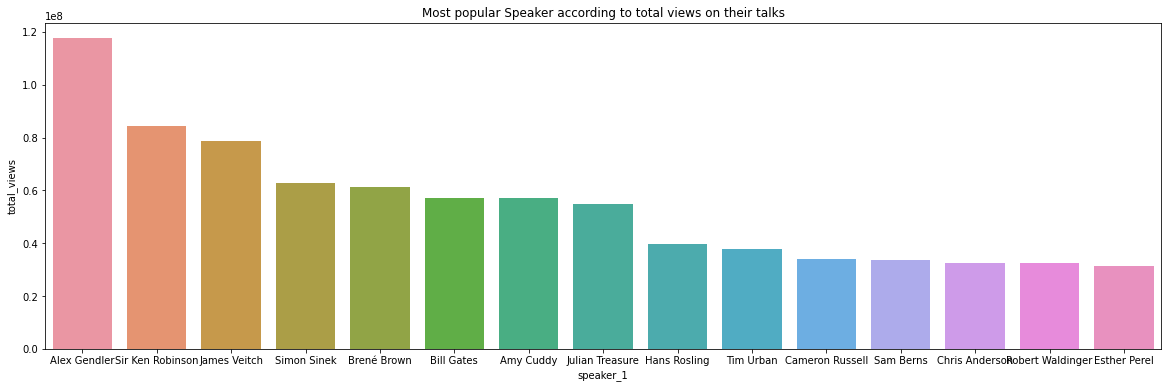

In [15]:
#printing most popular Speaker according to total views on their talks
plt.figure(figsize=(20,6))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='total_views',data=pop_speaker_df)

* **Alex Gendler is the most popular speaker followed by Sir Ken Robinson**

##**3.3 Let's explore the event column**

**Let's Check for unique event category in event column.**

In [16]:
#length of unique values in the event column
df['event'].nunique()

459

* **We have 459 unique entries in event column**

**Let's explore the most frequent event category**

In [17]:
#let's find the most frequent event categories
freq_event_df=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
freq_event_df.reset_index(inplace=True)
freq_event_df

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


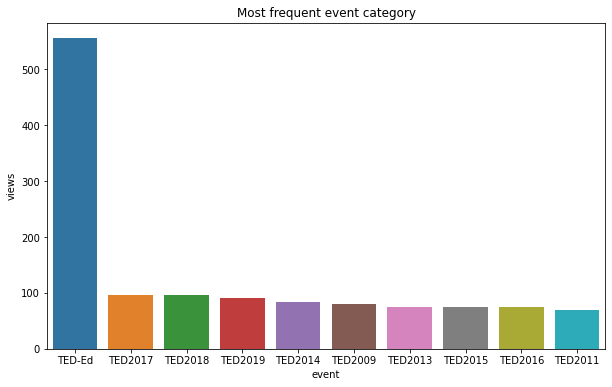

In [18]:
#plotting Most frequent event category
plt.figure(figsize=(10,6))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event_df)

* **TED-Ed is the most frequent event category with 556 entries followed by TED2017 and TED2018**

**Let's explore the most popular event category**

In [19]:
#let's find the most popular event categories
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_event_df.reset_index(inplace=True)
pop_event_df

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


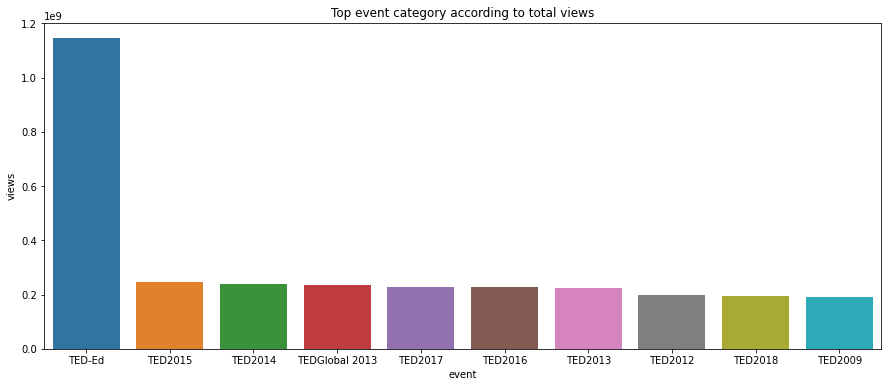

In [20]:
#plotting the Top event category according to total views
plt.figure(figsize=(15,6))
plt.title('Top event category according to total views')
sns.barplot(x='event',y='views',data=pop_event_df)

* **TED-Ed is the most popular and frequent event category having maximum number of total views followed by TED2015.**

##**3.4 Let's explore native_lang column**

In [21]:
df['native_lang'].value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

* **Here, approx 99% values in native_lang column is en.**
* **So, this column will not impact much and of no use to us and we can simply remove it.**

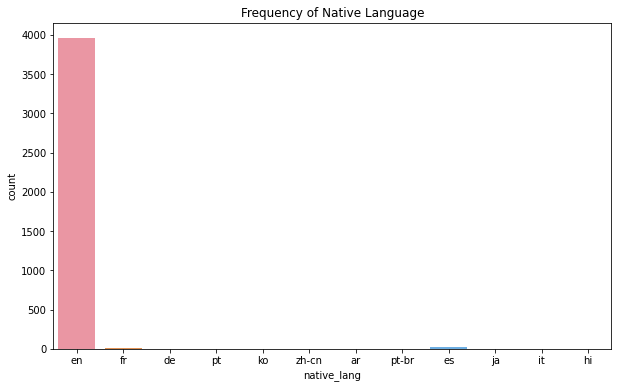

In [22]:
#Plotting countplot for native languages
plt.figure(figsize=(10,6))
plt.title('Frequency of Native Language')
sns.countplot(df['native_lang'])

In [23]:
#Dropping the native_language column
df.drop('native_lang',inplace=True,axis=1)

##**3.5 Let's explore the title column and visualize the most frequent words in title.**

In [24]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 words in the combination of all titles.


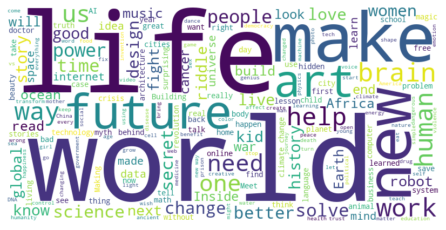

In [25]:
#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **Majoriity of Titles contains words like life, world, make, new, future, art.** 

##**3.6 Let's visualize most popular topic tags with word cloud**

There are 404126 words in the combination of all topics.


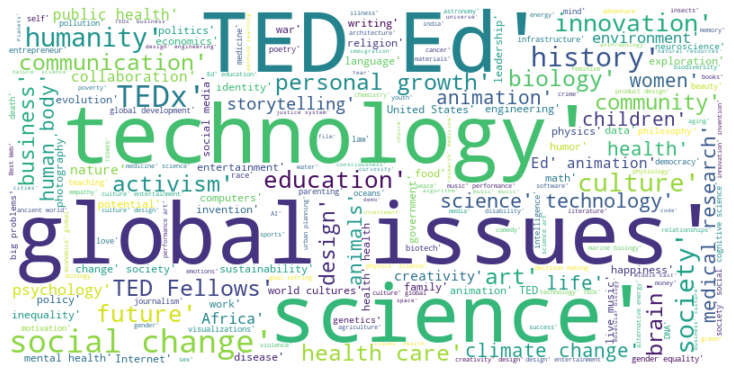

In [26]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##**3.7 Let's explore occupation column.**

In [27]:
df['occupations'][0]

"{0: ['climate advocate']}"

**Occupations column contains a dictionary for each row storing the occupations of each speaker as values.**

In [28]:
#counting the total null value in occupation column 
df['occupations'].isna().sum()

522

* **We have 522 Nan values in occupations column.**
* **Let's replace those NaN values with another category called 'other'.**

In [29]:
#Replacing all the null values with 'Others
value=str({0:['Other']})
df['occupations'].fillna(value,inplace=True)

In [30]:
df['occupations'].isna().sum()

0

In [31]:
#applying eval function on occupations column
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)

In [32]:
df['occupation']='Other'
for index,row in df.iterrows():
  occu_list=list(row['occupations'].values())[0][0]
  df.loc[index,'occupation']=str(occu_list)

In [33]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript,occupation
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,activist for environmental justice
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author


In [34]:
#Checking the length of unique occupation in column.
len(df['occupation'].unique())

1552

* **Now we have 1552 unique entries in the event column.**

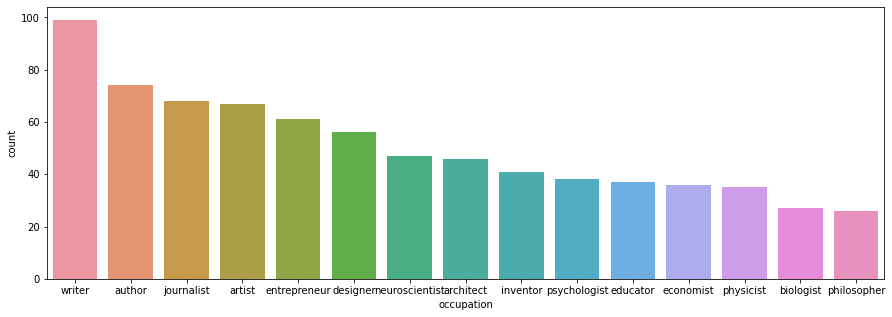

In [35]:
#Top 15 occupation of most frequent speaker's.
occ_df=df[df['occupation']!='Other']
occ_df=occ_df.groupby('occupation',as_index=False).agg({'talk_id':'count'}).rename(columns={'talk_id':'count'}).nlargest(15,'count')
sns.barplot(occ_df['occupation'],occ_df['count'])

In [36]:
occ_df.head(10)

,occupation,count
1537,writer,99
113,author,74
795,journalist,68
82,artist,67
525,entrepreneur,61
421,designer,56
995,neuroscientist,47
72,architect,46
780,inventor,41
1190,psychologist,38


* **Most of the speakers are writer folowed by author and journalist.**

**Let's make the world cloud for occupations column.**

There are 151 words in the combination of all occupations.


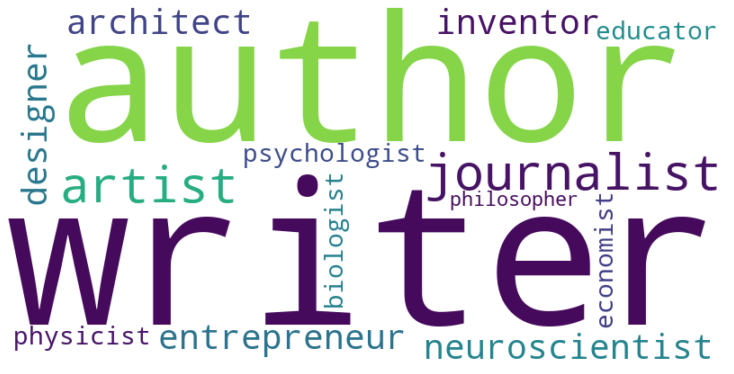

In [37]:
#joining the texts

text = " ".join(occ for occ in occ_df.occupation.astype(str))
print ("There are {} words in the combination of all occupations.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##**3.8 Let's explore published_date column**

In [38]:
df.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript,occupation
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate


In [39]:
#Converting published_date to datetime object
import datetime
df['published_date']=pd.to_datetime(df['published_date'])

In [40]:
#extracting release day, month and year from the published date column
df['release_day']=df['published_date'].apply(lambda x: x.day_name())
df['release_month']=df['published_date'].apply(lambda x: x.month_name())
df['release_year']=df['published_date'].apply(lambda x: x.year)

**I have extracted weekday month and year from published_date column and added three separate columns as:**
* **release_day**
* **release_month**
* **release_year**

**Checking the most frequent release day of the week.**

In [41]:
#checking the day of the month having maximum release date 
day_freq_df=df['release_day'].value_counts().reset_index().rename(columns={'index':'release_day','release_day':'count'})
day_freq_df

,release_day,count
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent release days')

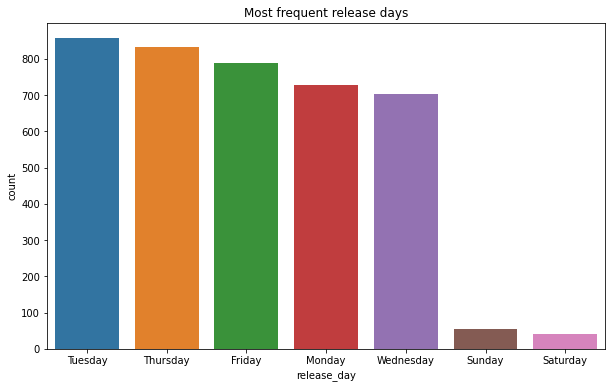

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(day_freq_df['release_day'],day_freq_df['count'])
plt.title('Most frequent release days')

**Let's check the best release day of the week with respect to average views**

In [43]:
day_view_df=df.groupby('release_day',as_index=False).agg({'views':'mean'})
day_view_df.sort_values('views',ascending=False,inplace=True)
day_view_df

,release_day,views
0,Friday,2.693812e+06
6,Wednesday,2.293402e+06
5,Tuesday,2.025352e+06
1,Monday,1.953866e+06
4,Thursday,1.907994e+06
3,Sunday,1.458068e+06
2,Saturday,9.821678e+05


Text(0.5, 1.0, 'Average Views w.r.t release days')

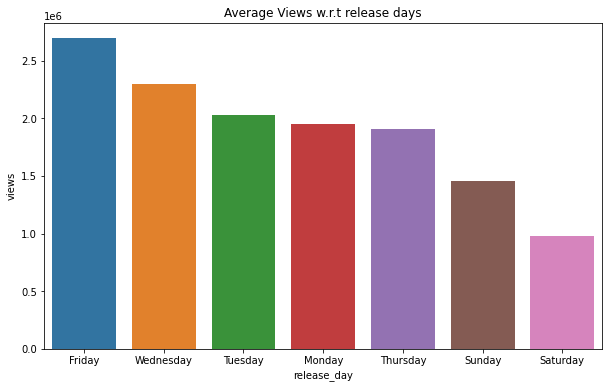

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(day_view_df['release_day'],day_view_df['views'])
plt.title('Average Views w.r.t release days')

* **Most videos are published on Tuesday followed by Thursday.**
* **But the videos published on Friday are more popular (i.e. have more average views) followed by wednesday.**
* **Friday release is impacting the views of the video**

###**Let's explore release_month column**

Text(0.5, 1.0, 'Most frequent release months')

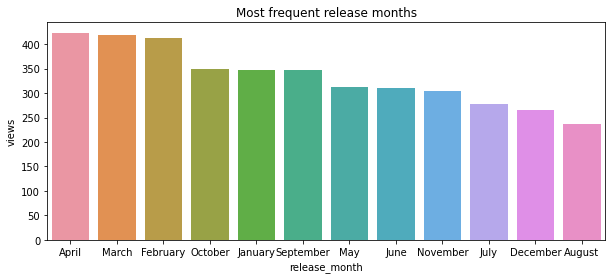

In [45]:
#checking months having maximum release 
freq_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
# checking the months having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

* **Most videos are released in April followed by March and Feb.**

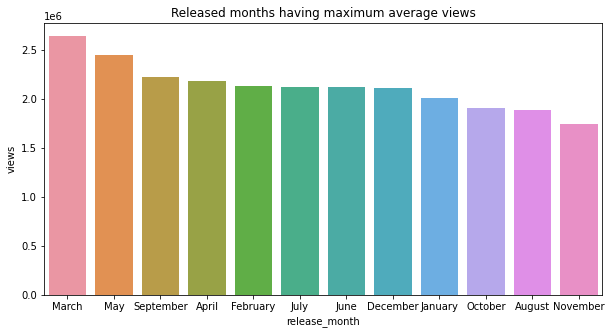

In [46]:
#Printing the most popular release month according to average Views
pop_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)

* **April have maximum released videos, But the videos released in March are more popular (i.e. have more average views) followed by May and Sep.**

###**Let's explore release_year column.**

In [47]:
df[['release_year','views']].groupby('release_year',as_index=False).agg({'views' : 'count'})

,release_year,views
0,2006,49
1,2007,119
2,2008,185
3,2009,215
4,2010,230
5,2011,255
6,2012,303
7,2013,242
8,2014,240
9,2015,220


Text(0.5, 1.0, 'Most frequent release years')

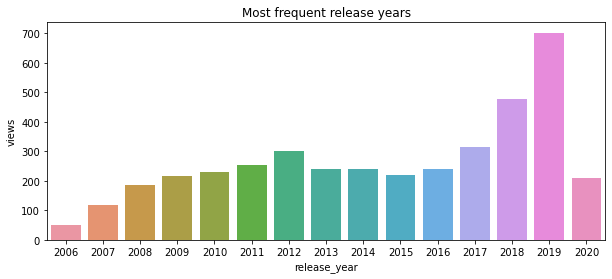

In [48]:
#checking years having maximum release 
freq_rel_year=df[['release_year','views']].groupby('release_year',as_index=False).agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
#Plotting the years having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

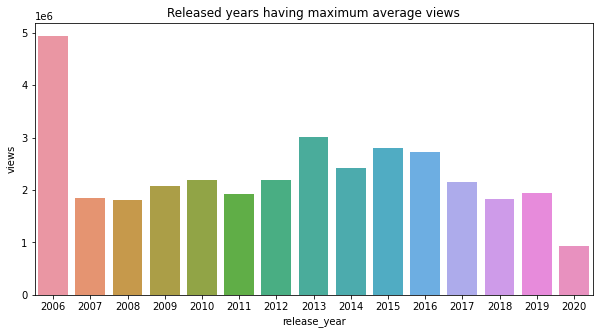

In [49]:
#Printing the most popular release years according to AVERAGE Views
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views',data=pop_rel_year)

* **Most videos are published in 2019 followed by 2018 and 2017.**
* **But the videos published in 2006 are most viewed followed by 2013 and 2015.**

##**3.9 Let's plot some numerical features.**

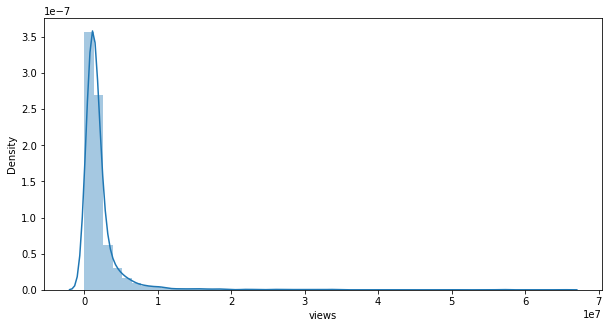

In [50]:
#plotting the distplot of tareget variable
plt.figure(figsize=(10,5))
sns.distplot(df['views'])

* **Here. our target variable is positively skewed.**

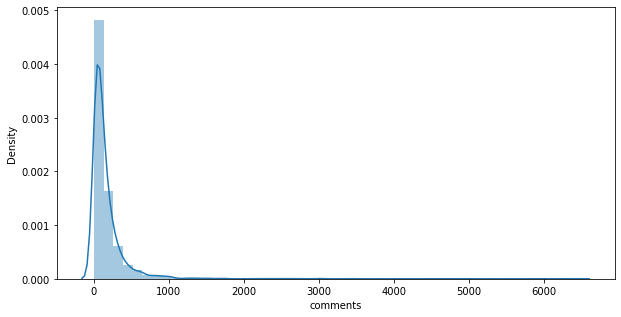

In [51]:
##plotting the distplot of comments
plt.figure(figsize=(10,5))
sns.distplot(df['comments'])

* **Here. our comments variable is also positively skewed.**

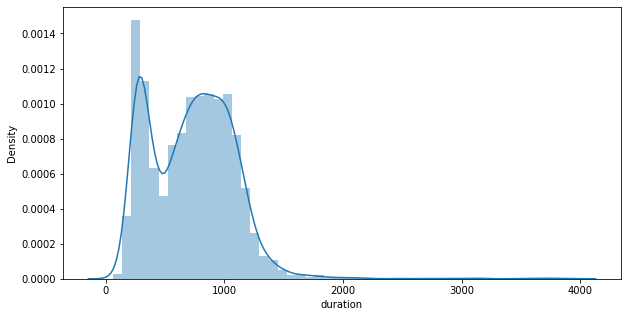

In [52]:
#plotting the distplot of duration
plt.figure(figsize=(10,5))
sns.distplot(df['duration'])

#**4.Feature Engineering**

**Feature engineering is a process of transforming the given data into a form which is easier to interpret**

**The intention of feature engineering is to achieve two primary goals:**

* **Preparing an input dataset that is compatible with and best fits the machine learning algorithm.**

* **Improving the performance of machine learning models**




###**4.1 Feature Engineering on Speaker_1 column**

**We are going to use target encoding for speaker_1 column as it has high cardinality number around 3000.**


**Target encoding is the process of replacing a categorical value with the mean of the target variable. Any non-categorical columns are automatically dropped by the target encoder model. This can help improve machine learning accuracy since algorithms tend to have a hard time dealing with high cardinality columns.**

In [53]:
def speaker_avg_views(speaker):
  avg=df.loc[df['speaker_1']==speaker,['views']].mean()
  return avg

In [54]:
#Doing target encoding on speaker_1 column
df['speaker_1_avg_views']=df['speaker_1'].apply(speaker_avg_views)

In [55]:
#Other possible way to encode
#pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
#pop_speaker=pop_speaker.to_dict()
#pop_speaker=pop_speaker.values()
#pop_speaker=  list(pop_speaker)[0]
#df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

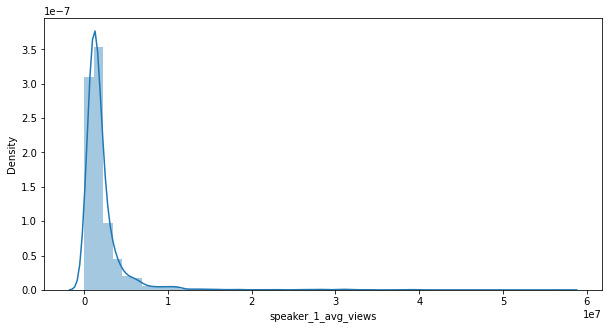

In [56]:
#Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

###**4.2 Feature Engineering on event column**

**The dataset has 459 unique event category but lots of these names are quite similar and can be categorised together.**

In [57]:
#finding the unique events from the event column.
event_list=list(df.event.unique())
len(event_list)

459

In [58]:
def event_avg_views(event):
  avg=df.loc[df['event']==event,['views']].mean()
  return avg

In [59]:
#applying target encoding on event column
df['event_wise_avg_views']=df['event'].apply(event_avg_views)

* **Now, we have done target encoding on categorical values in the event column.**
* **We can further use this feature directly while modelling.**
* **We can drop the event column now.**

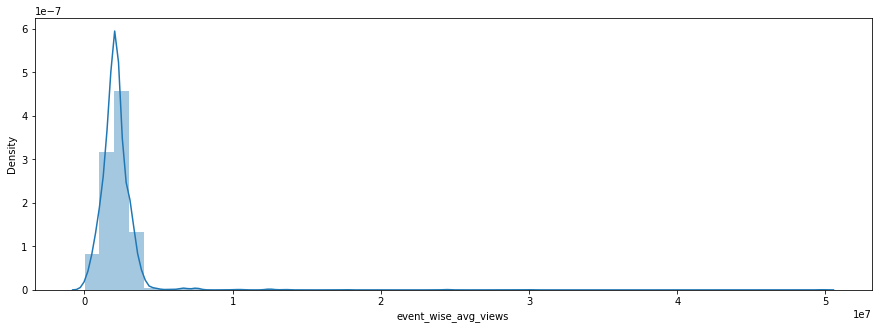

In [60]:
#Plotting the distplot of event_wise_avg_views
sns.distplot(df['event_wise_avg_views'])

* **Let's drop the event column as it is of no use now.**

In [61]:
#Dropping the event column
df=df.drop(columns='event')

###**4.3 Feature Engineering on available_lang column**

**In available_lang column we have a list of available languages for each video.**

In [62]:
df['available_lang']=df['available_lang'].apply(eval)

In [63]:
len(df['available_lang'][4])

62

**Let's add a new feature which contain the count of total no of language for a particular video.**

In [64]:
df['num_of_lang']=df['available_lang'].apply(len)

In [65]:
#dropping the available_lang column
df.drop(columns='available_lang',inplace=True)

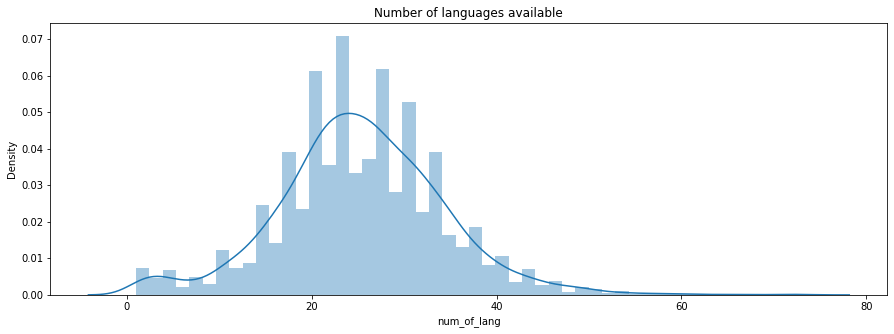

In [66]:
plt.title('Number of languages available')
sns.distplot(df['num_of_lang'])

###**4.4 Feature Engineering on topics column**

In [67]:
df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

* **The topics column basically contains the list of topic tags associated with each video.**

In [68]:
df['topics']=df['topics'].apply(eval)

**Let's add a new feature which contain the count of total no of topics for a particular video.**

In [69]:
df['num_of_tags']=df['topics'].apply(len)

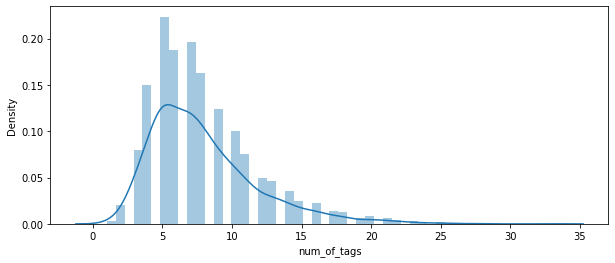

In [70]:
plt.figure(figsize=(10,4))
sns.distplot(df['num_of_tags'])

**Now, let's do target encoding on topics column.**

In [71]:
#extracting the unique topics from topics list of each talk
topic_lists=[]
for index,row in df.iterrows():
  topic_lists.extend(df.loc[index,'topics'])

unique_topics=set(topic_lists)

In [72]:
df['topics']

0       [alternative energy, cars, climate change, cul...
1       [Africa, Asia, Google, demo, economics, global...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [children, creativity, culture, dance, educati...
                              ...                        
4000    [activism, data, technology, mental health, so...
4001    [TED-Ed, education, history, animation, intell...
4002         [society, law, policy, justice system, TEDx]
4003    [TED-Ed, education, animation, United States, ...
4004    [animals, TED-Ed, animation, oceans, science, ...
Name: topics, Length: 4005, dtype: object

In [73]:
#Length of unique topics in the dataset
len(unique_topics)

457

In [74]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [75]:
len(unique_topics_avg_view_dict)

457

In [76]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
df['topics_wise_avg_views']=0
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  df['topics_wise_avg_views'][i]=temp//len(temp_topic)


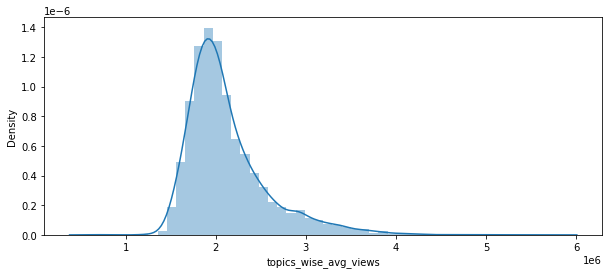

In [77]:
#plotting topics_wise_avg_views
plt.figure(figsize=(10,4))
sns.distplot(df['topics_wise_avg_views'])

###**4.5 Feature Engineering on published_date column.**

**We can add a new column called video_age which is the difference of current year and published year.**

In [78]:
df['video_age']=2022-df['release_year']

**Now, we can drop  published_date column.**

In [79]:
df.drop('published_date',inplace=True,axis=1)

###**4.6 Feature Engineering on related_talks column.**

In [80]:
df['related_talks']=df['related_talks'].apply(eval)

In [81]:
df['related_talks'][0].keys()

dict_keys([243, 547, 2093, 54715, 29968, 2339])

* **Related_talks column contains a dictionary containing information about six related videos with talk_id as key and video title as it's value.**
* **We can take mean of the views of related talks for each video and can add as a new feature called related_views.**

In [82]:
#df['related_views']=0
#for index,rows in df.iterrows():
#  related_ids=list(df['related_talks'][index].keys())
#  total_views=0
#  for id in related_ids:
#    total_views=+df.loc[df['talk_id']==id,'views']
#  df['related_views'][index]=total_views//len(related_ids)

In [83]:
#defining a new feature called related_views
df['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//len(id_list)

**Let's plot the related_views column.**

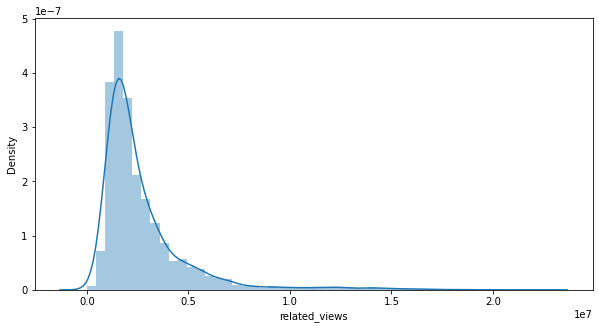

In [84]:
#Let's plot the related_views column
plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

* **It's a skewed normal distribution.**

#**5. Data Cleaning.**

##**5.1 Outlier Treatment on numerical columns.**

In [85]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
comments                 261
description                0
duration                  21
event_wise_avg_views     156
num_of_lang              121
num_of_tags              116
occupation                 0
occupations                0
recorded_date              0
related_talks              0
related_views            302
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views      373
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views    242
transcript                 0
video_age                  0
views                    393
dtype: int64

* **We have outliers in few columns which needs to be treated well.**
* **Replacing the outliers with the extreme values.**

In [86]:
# Replacing outliers with extreme values
for i in ['comments','duration','num_of_lang','num_of_tags','related_views','views','speaker_1_avg_views','topics_wise_avg_views','event_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [87]:
#Re-checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
comments                   0
description                0
duration                   0
event_wise_avg_views       0
num_of_lang                0
num_of_tags                0
occupation                 0
occupations                0
recorded_date              0
related_talks              0
related_views              0
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views        0
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views      0
transcript                 0
video_age                  0
views                      0
dtype: int64

**No outliers Detected**

In [88]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'comments', 'duration',
       'topics', 'related_talks', 'description', 'transcript', 'occupation',
       'release_day', 'release_month', 'release_year', 'speaker_1_avg_views',
       'event_wise_avg_views', 'num_of_lang', 'num_of_tags',
       'topics_wise_avg_views', 'video_age', 'related_views'],
      dtype='object')

In [89]:
len(df.columns)

25

**Let's drop unimportant columns.**

In [90]:
#dropping unimportant columns from the dataframe.
df.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'recorded_date','topics','related_talks','transcript','description','occupation','release_year'],inplace=True)

**Let's separate the dependent and independent variables.**

In [91]:
#separating the dependent and independent variables
y=df['views']
X=df.drop('views',axis=1)

**Doing one hot encoding using get_dummies function.**

In [92]:
#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 28)

In [93]:
X.head()

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_lang,num_of_tags,topics_wise_avg_views,video_age,related_views,release_day_Friday,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
0,272.0,977.0,2190599.25,3.778944e+06,43.0,9.0,1750846.0,16,1659584.0,0,...,0,0,0,0,1,0,0,0,0,0
1,413.0,1190.0,3987156.10,3.778944e+06,47.5,11.0,2290338.0,16,1573950.0,0,...,0,0,0,0,1,0,0,0,0,0
2,124.0,1286.0,2156189.75,3.778944e+06,26.0,9.0,1915719.0,16,3051136.0,0,...,0,0,0,0,1,0,0,0,0,0
3,219.0,1116.0,1979411.00,3.778944e+06,35.0,9.0,1642100.0,16,1053294.0,0,...,0,0,0,0,1,0,0,0,0,0
4,413.0,1164.0,4129562.75,3.778944e+06,47.5,7.0,2904226.0,16,5517750.0,0,...,0,0,0,0,1,0,0,0,0,0


* **Now, we have around 28 features after one hot encoding.**
* **Applying proper feature selection is must here to get rid of unimportant features.**

##**5.2 Let's treat nan values of numerical columns using KNNImputer**

In [94]:
#checking for null values
X.isna().sum() 

comments                   655
duration                     0
speaker_1_avg_views          0
event_wise_avg_views         0
num_of_lang                  0
num_of_tags                  0
topics_wise_avg_views        0
video_age                    0
related_views                0
release_day_Friday           0
release_day_Monday           0
release_day_Saturday         0
release_day_Sunday           0
release_day_Thursday         0
release_day_Tuesday          0
release_day_Wednesday        0
release_month_April          0
release_month_August         0
release_month_December       0
release_month_February       0
release_month_January        0
release_month_July           0
release_month_June           0
release_month_March          0
release_month_May            0
release_month_November       0
release_month_October        0
release_month_September      0
dtype: int64

* **Here, we have around 655 NaN values in comments column.**
* **Let's treat it using KNNImputer.**

In [95]:
#Taking features for using in KNNImputer
outlier_df=['duration','comments','speaker_1_avg_views','event_wise_avg_views']

In [96]:
from sklearn.impute import KNNImputer

In [97]:
# Before applying KNNImputer, we have to scale features so avoid bias.
scaler=MinMaxScaler()
X[outlier_df]=scaler.fit_transform(X[outlier_df])

from sklearn.impute import KNNImputer
# define imputer
imputer=KNNImputer()
#fitting the model
X[outlier_df]=imputer.fit_transform(X[outlier_df])
#again applying inverse_transform on the data
X[outlier_df]=scaler.inverse_transform(X[outlier_df])


In [98]:
#checking for null values
X.isna().sum() 

comments                   0
duration                   0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tags                0
topics_wise_avg_views      0
video_age                  0
related_views              0
release_day_Friday         0
release_day_Monday         0
release_day_Saturday       0
release_day_Sunday         0
release_day_Thursday       0
release_day_Tuesday        0
release_day_Wednesday      0
release_month_April        0
release_month_August       0
release_month_December     0
release_month_February     0
release_month_January      0
release_month_July         0
release_month_June         0
release_month_March        0
release_month_May          0
release_month_November     0
release_month_October      0
release_month_September    0
dtype: int64

* **Now we don't have any nan values in comments column.**

In [99]:
X.head()

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_lang,num_of_tags,topics_wise_avg_views,video_age,related_views,release_day_Friday,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
0,272.0,977.0,2190599.25,3.778944e+06,43.0,9.0,1750846.0,16,1659584.0,0,...,0,0,0,0,1,0,0,0,0,0
1,413.0,1190.0,3987156.10,3.778944e+06,47.5,11.0,2290338.0,16,1573950.0,0,...,0,0,0,0,1,0,0,0,0,0
2,124.0,1286.0,2156189.75,3.778944e+06,26.0,9.0,1915719.0,16,3051136.0,0,...,0,0,0,0,1,0,0,0,0,0
3,219.0,1116.0,1979411.00,3.778944e+06,35.0,9.0,1642100.0,16,1053294.0,0,...,0,0,0,0,1,0,0,0,0,0
4,413.0,1164.0,4129562.75,3.778944e+06,47.5,7.0,2904226.0,16,5517750.0,0,...,0,0,0,0,1,0,0,0,0,0


**Let's make a boxplot of duration column.**

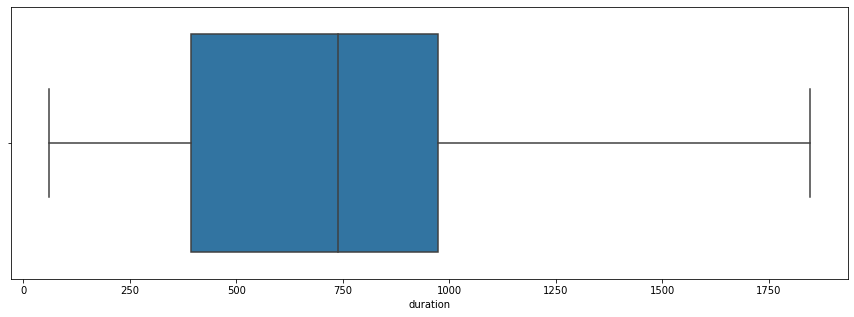

In [100]:
sns.boxplot(x=X['duration'])

**Let's make a boxplot of comments column.**

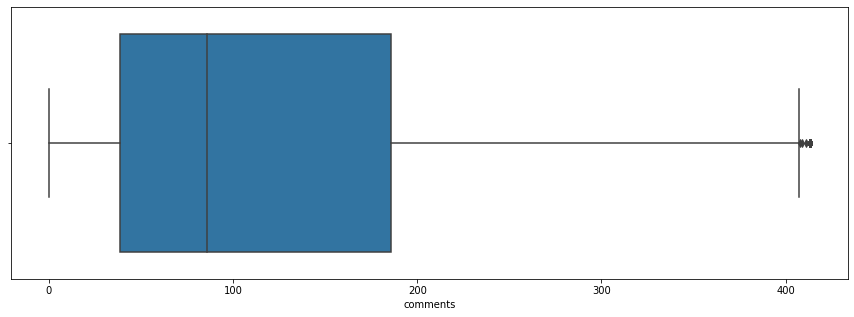

In [101]:
sns.boxplot(x=X['comments'])

#**6. Feature Selection**

In [102]:
#printing the shape of features
X.shape

(4005, 28)

**Let's do feature selection from these 28 dependent variables and select the best set of features.**

##**6.1 Feature selection for numerical features using f_regression.**

In [103]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [104]:
#finding the f scores of each features
f_scores = f_regression(X, y)
f_scores

(array([1.56930257e+03, 3.63920086e+01, 1.61894391e+04, 6.21645241e+02,
        9.43117088e+02, 2.22138034e+00, 8.21343686e+02, 7.26280093e-01,
        6.13368530e+02, 4.93457071e+01, 2.14095360e+00, 1.69801520e+01,
        1.32688878e+01, 4.22782469e+00, 1.54608611e+00, 5.17596240e-03,
        4.42937898e+00, 5.29481408e-01, 3.19042540e+00, 9.10855944e-01,
        3.61273001e+00, 1.59320065e+00, 7.00546927e-01, 1.20164944e+01,
        3.34840829e+00, 3.24993722e+00, 6.69041425e+00, 1.59197663e+00]),
 array([7.27669071e-290, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
        3.67017071e-186, 1.36190106e-001, 1.81039118e-164, 3.94142602e-001,
        4.12733032e-126, 2.51061953e-012, 1.43491232e-001, 3.85368618e-005,
        2.73265521e-004, 3.98310726e-002, 2.13786984e-001, 9.42649939e-001,
        3.53875418e-002, 4.66867525e-001, 7.41463988e-002, 3.39945041e-001,
        5.74106856e-002, 2.06942978e-001, 4.02649944e-001, 5.32863676e-004,
        6.73443607e-002, 7.15013746e-0

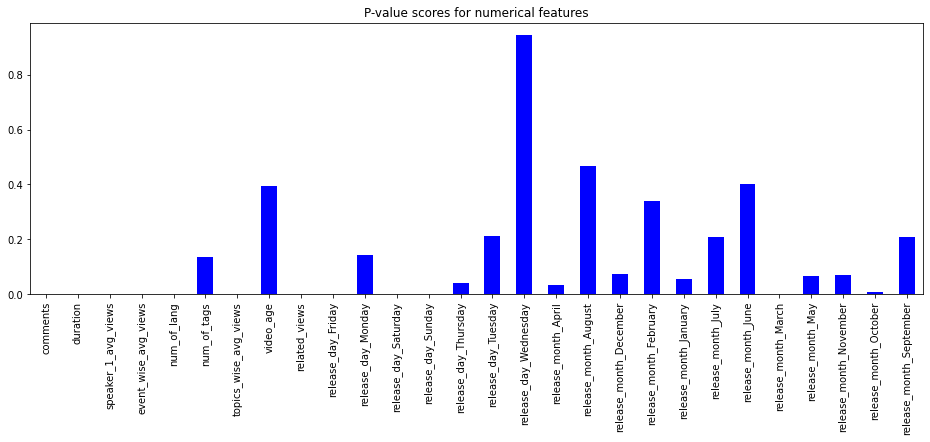

In [105]:
#The second array consists of p-values that we need. let's plot it
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

* **From here using p value analysis we can drop those features having high p values.**

In [106]:
#Let's take all the important features in a list.
ll=['comments', 'duration', 'num_of_lang', 'num_of_tags','event_wise_avg_views',
       'related_views', 'release_day_Friday','speaker_1_avg_views','topics_wise_avg_views']
len(ll)

9

In [107]:
X1=X.copy()

In [108]:
#let's take the important features
X=X[ll]

**Plotting the correlation matrix.**

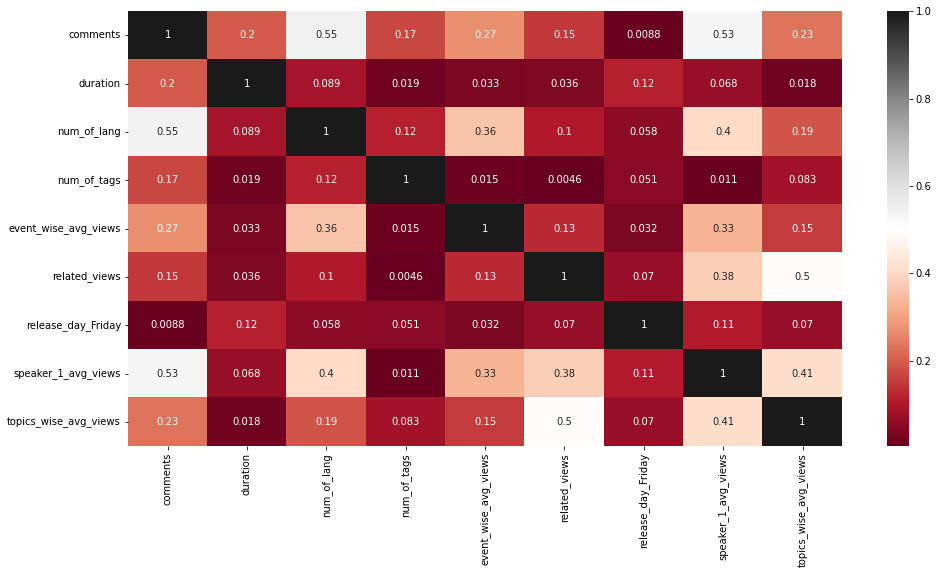

In [109]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(abs(X.corr()),annot=True, cmap='RdGy')

###**Applying train test split**

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Let's try to build a baseline model and we can improve from there.**

#**7. Fitting the regression models and HyperParameter Tuning**


##**7.1 Let's apply linear regression model.**

In [111]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [112]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is\t", MSE)

RMSE = np.sqrt(MSE)
print("RMSE on test is\t", RMSE)


print('Training MAE: \t {}'.format(mean_absolute_error(y_train, y_pred)),)
print('Test MAE: \t {}'.format(mean_absolute_error(y_test, y_test_pred)))


MSE on test is	 220116944044.6538
RMSE on test is	 469166.2221906579
Training MAE: 	 271225.1729901125
Test MAE: 	 264300.83410352084


In [113]:
reg.score(X_train,y_train),reg.score(X_test,y_test)

(0.8159066571093235, 0.8188292326442896)

* **Despite of the fact that our features are not following linear assumption which we have checked earlier, this model is giving a satisfactory score.**

##**7.2 Random Forest Regressor**

In [114]:
#applying RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 94431.99
Test MAE: 234472.24
Target mean: 1661354.12
Target std: 1102595.71


* **It's not a good score but we can improve by doing some feature selection and by hyperparameter tuning.**

**Defining Parameter Dict for Hyperparameter Tuning**

In [115]:
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

**1. Hyperparameter Tuning using Randomized Search CV**

In [116]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

In [117]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_

In [118]:
rf_optimal_model

RandomForestRegressor(criterion='mae', max_depth=4, min_samples_leaf=30,
                      min_samples_split=100, n_estimators=80)

In [119]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 204832.78
Test MAE: 211161.05


In [120]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.803284259211945
For test set the R_Squared for RFforest is 0.8001634381155687 and adjusted R_Squared is 0.7997132431075686


###**Let's plot all the scores of rf_optimal_model together.**

In [121]:
#Defining the model
model =[
        ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)]
      ]
#Let's run the the model and store the results in a dataframe
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_rf = pd.DataFrame(model_data)

#printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,186794.068522,192310.791737,0.806312,0.802822,485222.857812,489453.708159


###**Let's plot the feature importance score w.r.t. RF model**

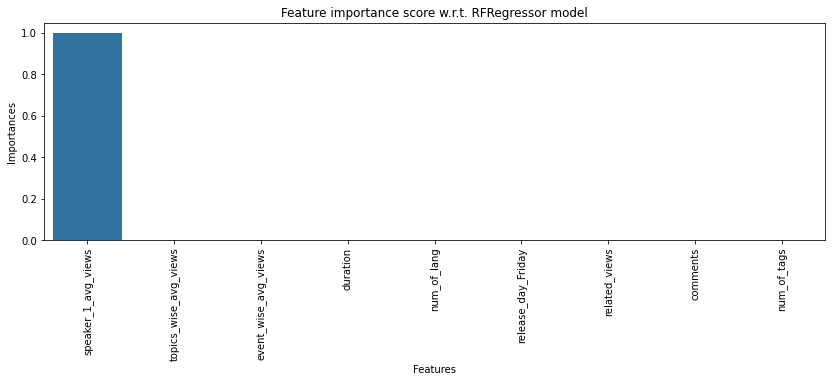

In [122]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')
plt.show() 

In [123]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
importances.head()

,Features,Importances
7,speaker_1_avg_views,0.999597
8,topics_wise_avg_views,0.000196
4,event_wise_avg_views,0.000061
1,duration,0.000050
2,num_of_lang,0.000045


* **speaker_avg_views is the most important feature in RandomForestregressor followed by event_wise_avg_views.**

##**7.3 Applying XGboost regressor model**

In [124]:
#XGBoost Regressor
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [125]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[04:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.3s
[04:45:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.2s
[04:45:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.2s
[04:45:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.2s
[04:45:20] WARNING: /worksp

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [126]:
#finding xgb_optimal_model
xgb_optimal_model = xgb_random.best_estimator_

In [127]:
xgb_optimal_model

XGBRegressor(max_depth=4, min_samples_leaf=50, min_samples_split=100,
             n_estimators=50)

In [128]:
# make predictions for test data
y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.9010068691455553
For test set the R_Squared for XGBoost is 0.8332812921834656 and adjusted R_Squared is 0.8329057056076586


In [129]:
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 177344.83432615447
Test MAE: 220731.61666489282


###**Let's plot all the scores of xgb_optimal_model together.**

In [130]:
#Defining the model
model = [
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]         
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_xgb = pd.DataFrame(model_data)
#printing the results_df_xgb
results_df_xgb

[04:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,XGBRegressor:,165856.98637,224101.681762,0.917223,0.832727,317208.390052,450812.079941


###**Let's plot the feature importance score w.r.t. XGBregressor model**

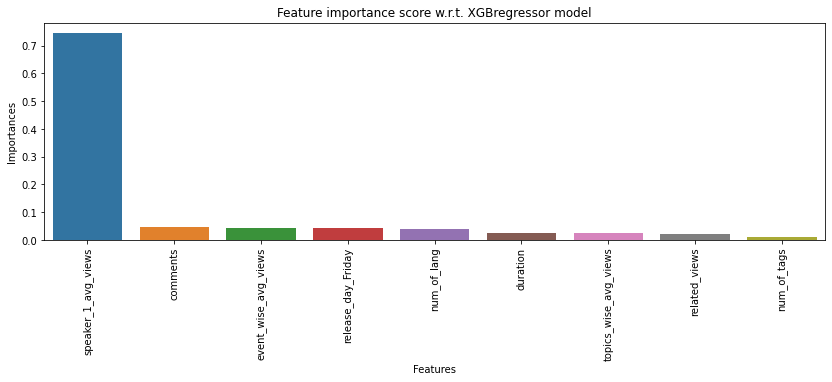

In [131]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

* **speaker1_avg_views is the most important feature in XGBregressor model followed by comments.**

##**7.4 Let's try ExtraTreesRegressor.**

In [132]:
et = ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, min_samples_leaf=2, min_samples_split=6)
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 117912.73
Test MAE: 201524.24


**Hyperparameter Tuning using Randomized Search CV**

In [133]:
#Extra Trees Regressor paramdict
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [134]:
# Create an instance of the Extratrees regressor
et_model = ExtraTreesRegressor(criterion='mae')

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   5.4s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   5.4s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   5.6s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   5.3s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   5.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   4.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   4.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   4.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   4.7s
[CV] END max_depth=4,

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [135]:
et_optimal_model = et_random.best_estimator_

In [136]:
y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 197648.77
Test MAE: 194559.87


In [137]:
# make predictions for test data
y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {et_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.798979364681606
For test the R_Squared for ExtraTreesRegressor is 0.8091915050493106 and adjusted R_Squared is 0.8087616486151288


###**Let's plot all the scores of et_optimal_model together.**

In [138]:
#Defining the model
model = [
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_et = pd.DataFrame(model_data)
#printing the results_df_et
results_df_et

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,ExtraTreeRegressor :,220297.404905,214812.795869,0.795257,0.806487,498878.446496,484884.158596


**Let's plot the feature importance score w.r.t. ExtraTreesRegressor model**

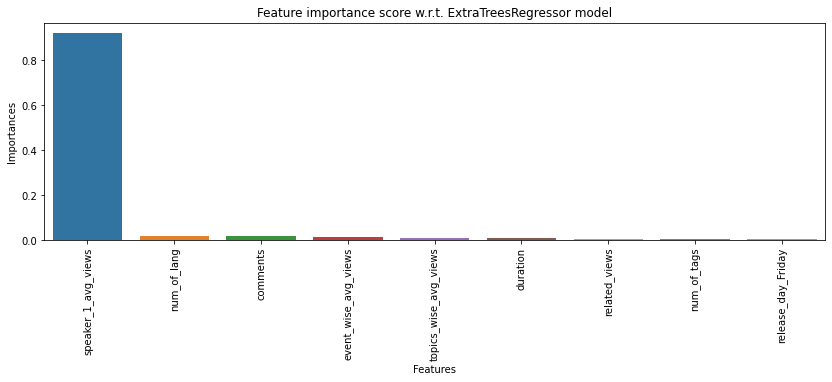

In [139]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': et.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. ExtraTreesRegressor model')
plt.show()

* **speaker1_avg_views is the most important feature in RandomForestregressor followed by comments.**

* **In all the models speaker_1_avg_views is impacting the much.**

#**8. Comparison of different regressor Models**

##**The ML regressor models that we have used are :**

* Lasso Regressor
* Ridge Regressor
* KNearestNeighbors Regressor
* Random Forest Regressor
* Extra Tree Regressor
* Gradient Boosting Regressor
* XGB Regressor

In [140]:
#Defining all these models
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]          
        ]

In [141]:
#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[04:50:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [142]:
#printing the results dataframe
results_df = pd.DataFrame(model_data)
results_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,Lasso:,271224.895298,264300.397457,0.815907,0.818829,473051.884784,469166.085505
1,Ridge:,271219.604420,264291.317994,0.815907,0.818832,473051.888858,469163.188732
2,KNeighborsRegressor:,230995.332537,279345.334193,0.856452,0.784829,417722.831227,511298.475839
3,RandomForest,186577.163702,191859.820471,0.806232,0.803232,485323.185248,488944.924220
4,ExtraTreeRegressor :,207369.445630,204937.124825,0.796576,0.806346,497268.104252,485060.227603
5,GradientBoostingRegressor:,185233.694555,231564.169862,0.897310,0.832201,353307.916592,451520.946575
6,XGBRegressor:,165856.986370,224101.681762,0.917223,0.832727,317208.390052,450812.079941


#**9. Final selection of the model**

**We choose MAE and not RMSE as the deciding factor of our model selection  because of the following reasons:**

* **RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases.**
* **MAE doesn’t increase with outliers. MAE is linear and RMSE is quadratically increasing.**

* **The best performing regressor model for this dataset is Random Forest Regressor on the basis of MAE.**

In [143]:
#let's print the scores of Random Forest Regressor model 
results_df.sort_values('MAE_test').head(1)

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
3,RandomForest,186577.163702,191859.820471,0.806232,0.803232,485323.185248,488944.92422


In [144]:
print(f'Mean value of our target variable is {y.mean()}')

Mean value of our target variable is 1661354.1194756555


* **For Random Forest Regressor model, MAE is around 12 % of target variable mean.**

#**10. Conclusion**
###We reached the end of our exercise.
###Started with loading the data so far we have done EDA ,feature engineering , data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.

###So far we have modelled on 
* **Lasso Regressor**
* **Ridge Regressor**
* **KNearestNeighbors Regressor**
* **Random Forest Regressor**
* **Extra Tree Regressor**
* **Gradient Boosting Regressor**
* **XGB Regressor**

###In all of these models our errors have been in the range of 2,00,000 which is around 10% of the average views. We have been able to correctly predict views 90% of the time.
###After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing and reducing learning rate.
###Given that only have 10% errors, our models have performed very well on unseen data due to various factors like feature selection,correct model selection,etc.

###Out of all these models RandomForestRegressor is the best performer in terms of MAE.
###In all the features speaker_wise_avg_views is most important this implies that speakers are directly impacting the views.